In [27]:
#importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [28]:
#loading the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [29]:
#loading the first five columns of the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
#getting basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
#getting the unique values in the stroke column
pd.unique(data['stroke'])

array([1, 0], dtype=int64)

In [32]:
sum_stroke = data['stroke'].sum()
print(sum_stroke)

249


In [33]:
#dropping the id columna
df = data.drop('id', axis = 1)

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


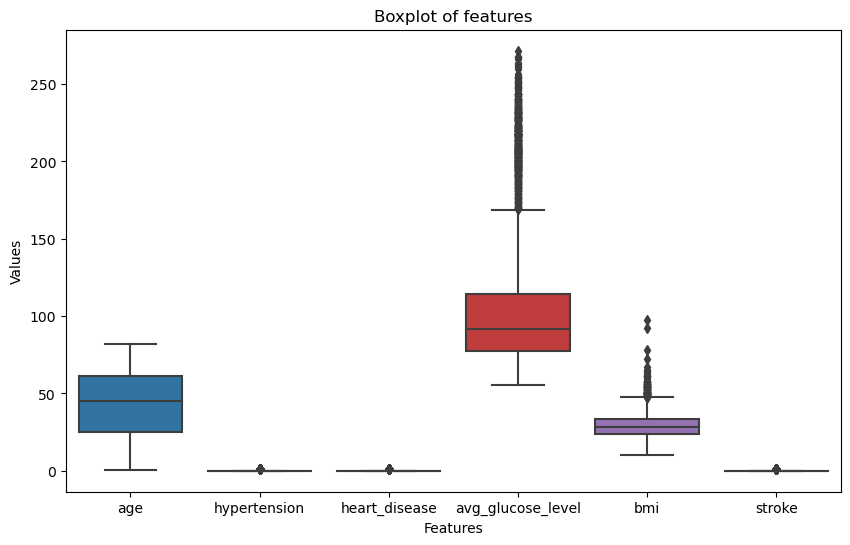

In [35]:
#filling the null values in the bmi column. first let's check for outliers in the data
plt.figure(figsize = (10, 6))
sns.boxplot(data = df)
plt.title('Boxplot of features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [36]:
#dropping rows with null values in the bmi column
df_cleaned = df.dropna(subset = 'bmi')

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


### Exploratory DataAnalysis

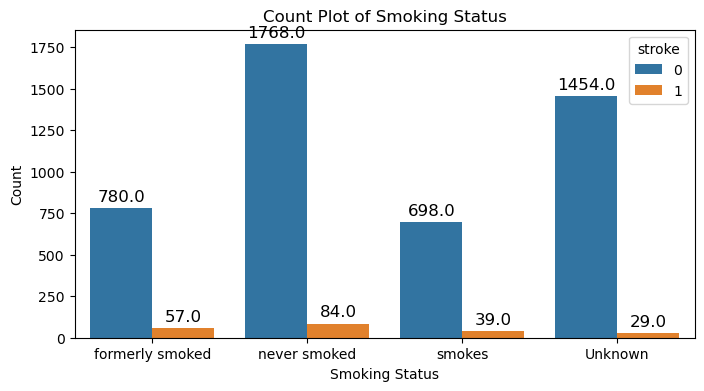

In [38]:
#let's get a count plot of smoking status
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'smoking_status', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

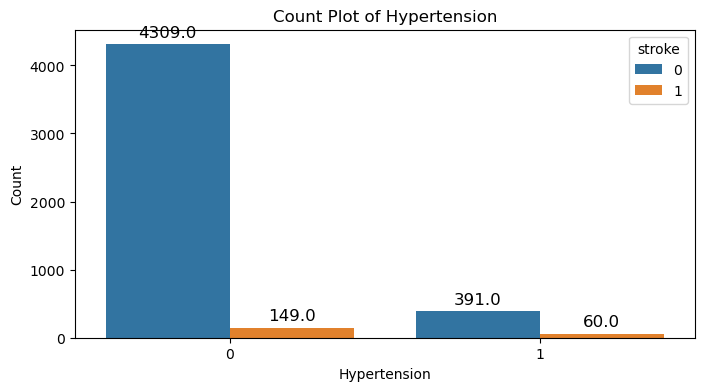

In [39]:
#count plot of hypertension 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'hypertension', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

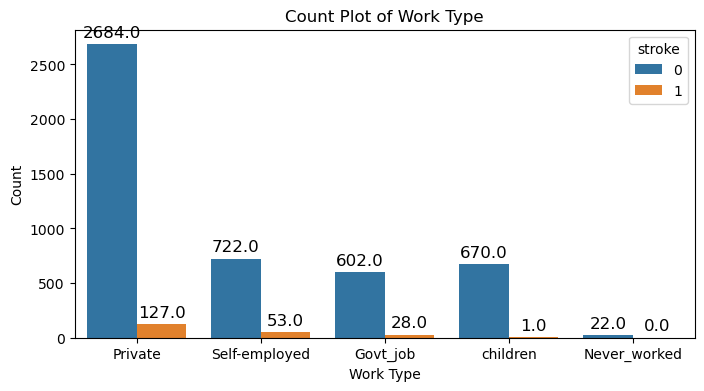

In [40]:
#count plot of wotk type 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'work_type', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

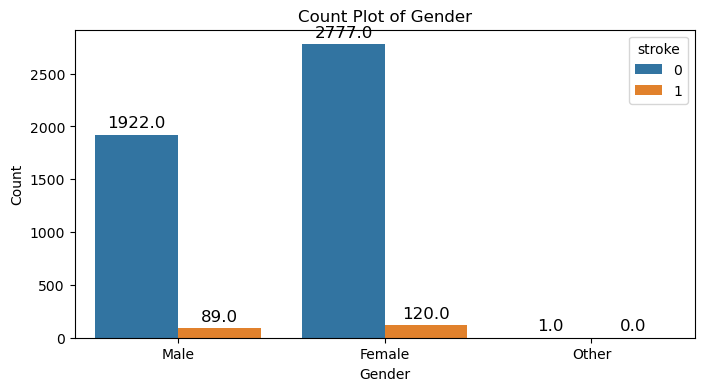

In [41]:
#count plot of gender 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'gender', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

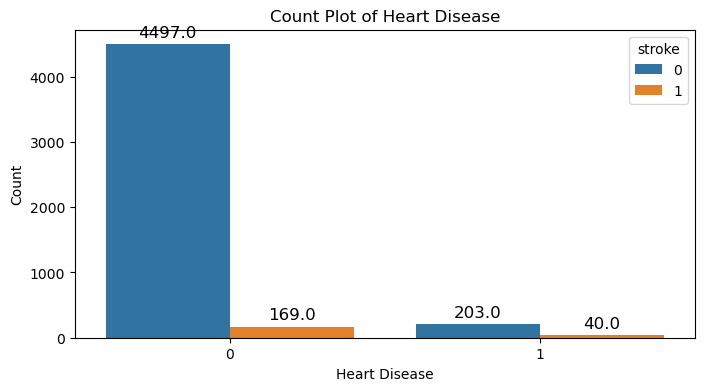

In [42]:
#count plot of heart disease 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'heart_disease', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

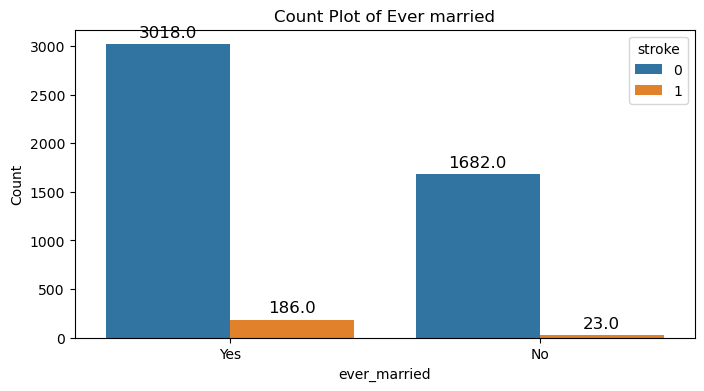

In [43]:
#count plot of ever married 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'ever_married', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Ever married')
plt.xlabel('ever_married')
plt.ylabel('Count')
plt.show()

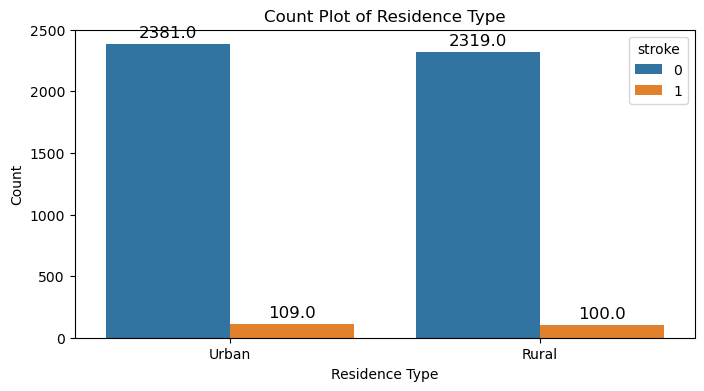

In [44]:
#count plot of residence type 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'Residence_type', data = df_cleaned, hue = 'stroke')
#adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black', xytext = (0,5),
               textcoords = 'offset points')
plt.title('Count Plot of Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

#### Building a supervised machine learning model to predict stroke

In [45]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [46]:
#encoding the categorical columns
le = LabelEncoder()
df_cleaned['gender'] = le.fit_transform(df_cleaned['gender'])
df_cleaned['ever_married'] = le.fit_transform(df_cleaned['ever_married'])
df_cleaned['work_type'] = le.fit_transform(df_cleaned['work_type'])
df_cleaned['Residence_type'] = le.fit_transform(df_cleaned['Residence_type'])
df_cleaned['smoking_status'] = le.fit_transform(df_cleaned['smoking_status'])

In [47]:
#viewing the first five columns of the data with the encoded columns
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [49]:
#scaling the dataset with the standard scaler
scaler = StandardScaler()
df_cleaned[['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']] = scaler.fit_transform(
    df_cleaned[['age','work_type','avg_glucose_level', 'bmi', 'smoking_status']]
)

In [50]:
#viewing the first five columns of the scaled dataframe
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.070138,0,1,1,-0.155697,1,2.777698,0.981345,-0.351788,1
2,1,1.646563,0,1,1,-0.155697,0,0.013842,0.459269,0.585232,1
3,0,0.272012,0,0,1,-0.155697,1,1.484132,0.701207,1.522252,1
4,0,1.602222,1,0,1,0.759651,0,1.549193,-0.623083,0.585232,1
5,1,1.690903,0,0,1,-0.155697,1,1.821368,0.013595,-0.351788,1


In [51]:
#declaring the input(X) and output(y) variables
X = df_cleaned.drop('stroke', axis = 1)
y = df_cleaned['stroke']

In [52]:
#splitting the dataset into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [53]:
#initializing the random forest classifier and training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
#Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:' f'{accuracy}')
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print('ROC:', f'{roc_score}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', f'{conf_matrix}')
cla_rep = classification_report(y_test, y_pred)
print('Classification Report: \n', f'{cla_rep}')

Accuracy Score:0.955193482688391
ROC: 0.7535714285714286
Confusion matrix: 
 [[938   2]
 [ 42   0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [ ]:
#sav